In [2]:
import pandas as pd
df = pd.read_csv('waterquality.csv',
                names = ["수온", "염분", "용존산소량", "화학산소요구량","PH", "탁도", "총질소", "총인", "class"])
print(df.head(10))

     수온     염분  용존산소량  화학산소요구량    PH     탁도    총질소     총인  class
0  2.58  31.40  10.37      0.0  7.76  12.25  0.938  0.063      0
1  2.63  31.43  10.39      0.0  7.76  12.28  0.938  0.063      0
2  2.70  31.47  10.40      0.0  7.76  12.30  0.938  0.063      0
3  2.76  31.52  10.41      0.0  7.76  12.41  0.938  0.063      0
4  2.82  31.53  10.41      0.0  7.76  12.48  0.938  0.063      0
5  2.87  31.52  10.42      0.0  7.76  12.56  0.938  0.063      0
6  2.94  31.56  10.42      0.0  7.76  12.60  0.938  0.063      0
7  3.00  31.54  10.42      0.0  7.76  12.59  0.938  0.063      0
8  3.07  31.52  10.40      0.0  7.76  12.56  0.938  0.063      0
9  3.11  31.44  10.40      0.0  7.76  12.43  0.938  0.063      0


In [3]:
print(df.info()) # 항목별 각 정보의 형식을 보여줌

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   수온       2000 non-null   float64
 1   염분       2000 non-null   float64
 2   용존산소량    2000 non-null   float64
 3   화학산소요구량  2000 non-null   float64
 4   PH       2000 non-null   float64
 5   탁도       2000 non-null   float64
 6   총질소      2000 non-null   float64
 7   총인       2000 non-null   float64
 8   class    2000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 140.8 KB
None


In [4]:
print(df.describe()) # 샘플수, 평균, 표준편차, 최솟값, 백분위, 최대값을 보여줌

                수온           염분        용존산소량      화학산소요구량           PH  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      3.383980    31.286960    10.054360     2.850290     7.722485   
std       1.750479     1.029375     0.644459     0.665468     0.432557   
min      -0.610000    27.090000     0.000000     0.000000     0.000000   
25%       2.257500    30.680000     9.920000     2.520000     7.710000   
50%       3.040000    31.610000    10.190000     2.940000     7.760000   
75%       4.882500    32.150000    10.400000     3.340000     7.810000   
max       8.000000    32.480000    10.800000     3.880000     7.860000   

                탁도          총질소           총인        class  
count  2000.000000  2000.000000  2000.000000  2000.000000  
mean     12.291165     1.256275     0.066487     0.760500  
std       2.658445     0.474894     0.008956     0.426885  
min       0.000000     0.271000     0.053000     0.000000  
25%      11.107500     0.909000  

In [5]:
print(df[['용존산소량', 'class']])

      용존산소량  class
0     10.37      0
1     10.39      0
2     10.40      0
3     10.41      0
4     10.41      0
...     ...    ...
1995   8.80      0
1996   8.85      0
1997   8.97      0
1998   9.02      0
1999   9.01      0

[2000 rows x 2 columns]


In [6]:
print(df[['용존산소량', 'class']].groupby(['용존산소량'], as_index=False).mean().sort_values(by='용존산소량', ascending=True))
gang = df[['용존산소량', 'class']].groupby(['용존산소량'], as_index=False).mean().sort_values(by='용존산소량', ascending=True)

     용존산소량     class
0     0.00  0.000000
1     8.16  1.000000
2     8.17  1.000000
3     8.18  0.500000
4     8.20  0.000000
..     ...       ...
235  10.75  0.600000
236  10.77  0.500000
237  10.78  0.333333
238  10.79  0.000000
239  10.80  0.000000

[240 rows x 2 columns]


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


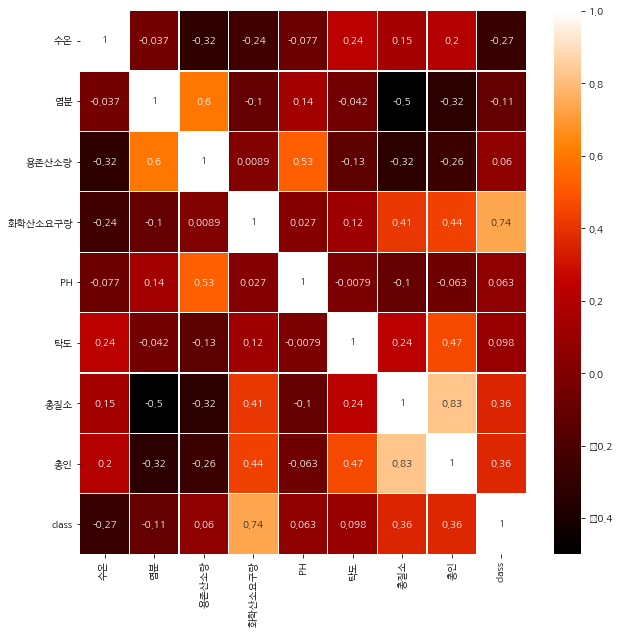

In [56]:
import matplotlib.pyplot as plt  #그래프 임폴트
import seaborn as sns
plt.figure(figsize=(10, 10))
plt.rc('font', family='NanumGothic') # 한글 폰트
sns.heatmap(df.corr(), linewidths = 0.1, vmax = 1, cmap=plt.cm.gist_heat, linecolor='white', annot=True) #heatmap 그래프로 시각화
plt.show()

In [57]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense     #텐서플로 함수 선언
import numpy as np
import tensorflow as tf
# seed값 생성
np.random.seed(3) 
tf.random.set_seed(3)
#data로드
dataset = np.loadtxt("waterquality.csv", delimiter=",")
X = dataset[:,0:-1] 
Y = dataset[:,-1]

In [58]:
#모델 설정
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(8, activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid')) 
#모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [59]:
#모델 실행
model.fit(X, Y, epochs=100, batch_size=8)

Epoch 1/100
250/250 [==============================] - 0s 802us/step - loss: 0.5278 - accuracy: 0.7295
Epoch 2/100
250/250 [==============================] - 0s 775us/step - loss: 0.4310 - accuracy: 0.7795
Epoch 3/100
250/250 [==============================] - 0s 754us/step - loss: 0.3664 - accuracy: 0.8215
Epoch 4/100
250/250 [==============================] - 0s 766us/step - loss: 0.3153 - accuracy: 0.8540
Epoch 5/100
250/250 [==============================] - 0s 770us/step - loss: 0.2717 - accuracy: 0.8770
Epoch 6/100
250/250 [==============================] - 0s 759us/step - loss: 0.2442 - accuracy: 0.8870
Epoch 7/100
250/250 [==============================] - 0s 754us/step - loss: 0.2107 - accuracy: 0.9035
Epoch 8/100
250/250 [==============================] - 0s 762us/step - loss: 0.2018 - accuracy: 0.9160
Epoch 9/100
250/250 [==============================] - 0s 750us/step - loss: 0.1815 - accuracy: 0.9215
Epoch 10/100
250/250 [==============================] - 0s 858us/step - l

In [60]:
#결과 출력
print("\n Accuracy : %f" % (model.evaluate(X, Y)[1]))

63/63 [==============================] - 0s 744us/step - loss: 0.0248 - accuracy: 0.9910

 Accuracy : 0.991000
